# Phillies Semi-Finalist Round
- https://questionnaire-148920.appspot.com/swe/
- https://questionnaire-148920.appspot.com/swe/data.html

In [10]:
import pandas as pd
import re
import matplotlib.pyplot as plt

First let's use pandas to read the html table from the given url.

In [6]:
url = "https://questionnaire-148920.appspot.com/swe/data.html"
dfs = pd.read_html(url)

In [7]:
df = dfs[0]

This pandas method will return a list of dataframe objects. There is only one html table on the provided URL, so we are going to look at the first item in the list. Let's print out the dataframe and make sure the table has been scraped correctly.

In [8]:
df

,Player,Salary,Year,Level
0,"Abreu, Jose","$11,666,667",2016,MLB
1,"Acevedo, Andury","$507,500",2016,MLB
2,"Ackley, Dustin","$3,200,000",2016,MLB
3,"Adames, Cristhian","$507,500",2016,MLB
4,"Adams, Austin","$507,500",2016,MLB
...,...,...,...,...
1203,"Zimmerman, Ryan","$14,000,000",2016,MLB
1204,"Zimmermann, Jordan","$18,000,000",2016,MLB
1205,"Zobrist, Ben","$10,500,000",2016,MLB
1206,"Zunino, Mike","$507,500",2016,MLB


Now let's take a closer look at the salary data.

In [85]:
for salary in df['Salary']:
    print(salary)

$11,666,667
$507,500
$3,200,000
$507,500
$507,500
$1650000
$507,500
$507,500
$507,500
$2,000,000
$507,500
$1,100,000
$507,500
$507,500
$507,500
507500
$507,500
$4,150,000
$507,500
$507,500
$2,650,000
$507,500
$3,687,500
$507,500
$507,500
$4,250,000
$507,500
$$$507,500
$1,350,000
$15,800,000
no salary data
$507,500
$507,500
$507,500
$15,250,000
$507,500
nan
$507,500
507500
$507,500
$2,916,667
$507,500
$507,500
$5,000,000
$507,500
$507,500
$10,700,000
$507,500
no salary data
$2,500,000
$1,390,000
$2000000
$4,500,000
$8,750,000
$507,500
$507,500
$18,000,000
$507,500
$507,500
$507,500
$507,500
$507,500
$507,500
$507500
$507,500
$1,500,000
$1,050,000
$507,500
$507,500
$507,500
$507,500
$507,500
nan
$507,500
$$5,375,000
507500
$507,500
$14,000,000
$507,500
$1,250,000
$507,500
$507,500
$507,500
$507,500
$507,500
$6,200,000
$$$15,000,000
$18,000,000
$7,500,000
$507,500
$507,500
$507,500
$507,500
$507,500
$507,500
$507,500
nan
$507,500
$507,500
$507,500
$507,500
$507,500
$3,500,000
$1,450,000
$

After glancing through the data, there are several different errors. Let's use a dictionary to look at all the unique values provided in the salary column for each row in the dataframe.

In [140]:
from collections import defaultdict

unique = defaultdict(int)

for salary in df['Salary']:
    if pd.isna(salary):
        unique['nan'] += 1
    else:
        unique[salary] += 1
    
unique

defaultdict(int,
            {'$11,666,667': 2,
             '$507,500': 619,
             '$3,200,000': 1,
             '$1650000': 1,
             '$2,000,000': 14,
             '$1,100,000': 2,
             '507500': 7,
             '$4,150,000': 2,
             '$2,650,000': 1,
             '$3,687,500': 1,
             '$4,250,000': 4,
             '$$$507,500': 10,
             '$1,350,000': 4,
             '$15,800,000': 3,
             'no salary data': 26,
             '$15,250,000': 1,
             'nan': 20,
             '$2,916,667': 1,
             '$5,000,000': 10,
             '$10,700,000': 1,
             '$2,500,000': 12,
             '$1,390,000': 1,
             '$2000000': 1,
             '$4,500,000': 4,
             '$8,750,000': 1,
             '$18,000,000': 5,
             '$507500': 14,
             '$1,500,000': 7,
             '$1,050,000': 2,
             '$$5,375,000': 1,
             '$14,000,000': 5,
             '$1,250,000': 4,
             '$6,200,00

Now let's clean and reformat our data. We can do this by iterating trough each item, filtering out any missing values, further filtering using regex, and performing some string operations to reformat the data into a list of integers.

We will use a regular expression to represent the format of the salary data. This regular expression will handle the cases where the salary data has multple '$' characters.

In [147]:
clean_data = []

for i in range(len(df['Salary'])):
    if df['Salary'][i] == 'no salary data' or pd.isna(df['Salary'][i]):
        continue
    temp = [x[0] for x in re.findall('(\$[0-9]+(\.[0-9]+)?)', df['Salary'][i].replace(',', ''))]
    if len(temp) == 0:
        temp = [df['Salary'][i]]
    if temp[0][0] != '$':
        clean_data.append(int(temp[0]))
    else:
        clean_data.append(int(temp[0][1:]))
            
clean_data.sort(reverse=True)

In [148]:
print(len(clean_data))

1162


Now we have a filtered, sorted dataset of salaries. We can see there are 1162 salaries left compared to the 1208 from the original table. The 46 items that have been filtered out come from the 26 'no salary data' items and the 20 'nan' items.

Let's plot the salary distribution for all 1162 salaries.

(array([874., 111.,  61.,  48.,  23.,  19.,  15.,   5.,   4.,   2.]),
 array([  507500. ,  3913892.9,  7320285.8, 10726678.7, 14133071.6,
        17539464.5, 20945857.4, 24352250.3, 27758643.2, 31165036.1,
        34571429. ]),
 <a list of 10 Patch objects>)

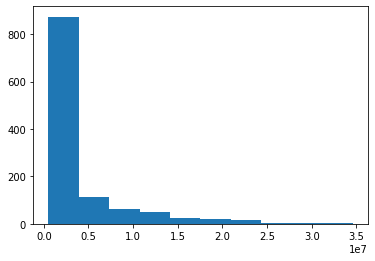

In [150]:
plt.hist(clean_data)

Now that the data has been filtered, let's look at all the unique salaries.

In [152]:
from collections import defaultdict

unique_salaries = defaultdict(int)

for salary in clean_data:
    unique_salaries[salary] += 1
    
unique_salaries

defaultdict(int,
            {34571429: 1,
             34000000: 1,
             30000000: 1,
             28410000: 1,
             28000000: 2,
             25857143: 1,
             25000000: 4,
             24000000: 1,
             23500000: 1,
             23000000: 1,
             22750000: 1,
             22142857: 1,
             22125000: 1,
             22000000: 1,
             21857143: 1,
             21750000: 1,
             21607143: 1,
             21571429: 1,
             21142857: 1,
             21118782: 1,
             21000000: 2,
             20833333: 2,
             20777777: 1,
             20500000: 1,
             20200000: 1,
             20125000: 1,
             20000000: 5,
             19500000: 1,
             18500000: 1,
             18000000: 5,
             17600000: 1,
             17500000: 1,
             17428571: 1,
             17000000: 2,
             16800000: 1,
             16333333: 1,
             16083333: 1,
             16050000

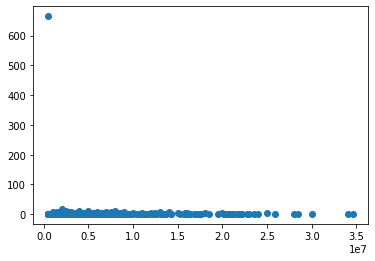

In [155]:
plt.scatter(*zip(*unique_salaries.items()))

Now let's do the same analysis with the top 125 salaries.

(array([32., 27., 19., 10., 22.,  4.,  5.,  3.,  1.,  2.]),
 array([10000000. , 12457142.9, 14914285.8, 17371428.7, 19828571.6,
        22285714.5, 24742857.4, 27200000.3, 29657143.2, 32114286.1,
        34571429. ]),
 <a list of 10 Patch objects>)

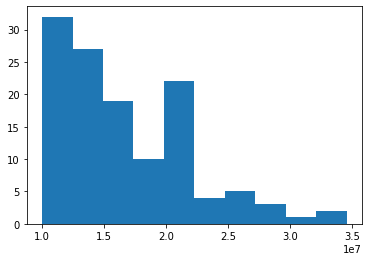

In [156]:
plt.hist(clean_data[:125])

In [157]:
unique_top_salaries = defaultdict(int)

for salary in clean_data[:125]:
    unique_top_salaries[salary] += 1
    
unique_top_salaries

defaultdict(int,
            {34571429: 1,
             34000000: 1,
             30000000: 1,
             28410000: 1,
             28000000: 2,
             25857143: 1,
             25000000: 4,
             24000000: 1,
             23500000: 1,
             23000000: 1,
             22750000: 1,
             22142857: 1,
             22125000: 1,
             22000000: 1,
             21857143: 1,
             21750000: 1,
             21607143: 1,
             21571429: 1,
             21142857: 1,
             21118782: 1,
             21000000: 2,
             20833333: 2,
             20777777: 1,
             20500000: 1,
             20200000: 1,
             20125000: 1,
             20000000: 5,
             19500000: 1,
             18500000: 1,
             18000000: 5,
             17600000: 1,
             17500000: 1,
             17428571: 1,
             17000000: 2,
             16800000: 1,
             16333333: 1,
             16083333: 1,
             16050000

In [9]:
plt.scatter(*zip(*unique_top_salaries.items()))
plt.show()

NameError: name 'unique_top_salaries' is not defined

Finally we can compute the average of the top 125 salaries

In [164]:
qualifying_offer = sum(clean_data[:125]) / 125
print(qualifying_offer)

16490394.144


In [165]:
"The qualifying offer for a free agent based on this data set should be $16,490,394.14"

'The qualifying offer for a free agent based on this data set should be $16,490,394.14'